# Imports

In [111]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [125]:
import pandas as pd
import os 

#df = pd.read_excel("C:/Users/alexa/exp-ml/wpf-explainableML/spotify-2023.xlsx")
# current_directory = os.getcwd()
# print("Current Working Directory:", current_directory)
# os.chdir("C:/Users/alexa/exp-ml/wpf-explainableML")
#current_directory = os.getcwd()
# print("Current Working Directory:", current_directory)
df = pd.read_excel("spotify-2023.xlsx")


In [126]:
df


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


<Axes: >

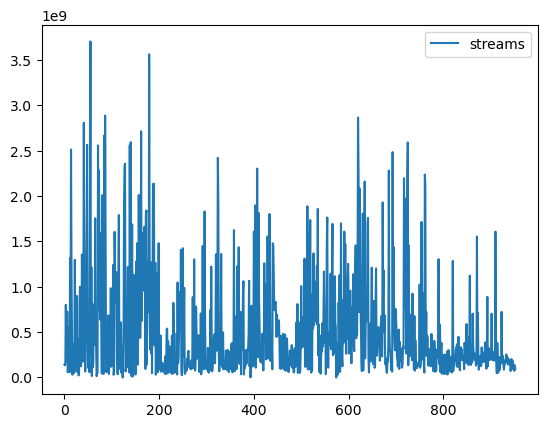

In [114]:

df.plot(y = 'streams')


In [115]:
rf = RandomForestRegressor()
x = np.array([[1, 2], [3, 4], [5, 6]]) #basically a matrix: 3 rows and 2 columns => 2-d array
y = np.array([10, 20, 30])

rf.fit(x, y)
predictions = rf.predict(np.array([[7, 8]]))


print(predictions)
    

[26.7]


In [116]:
rf.fit(df[['instrumentalness_%', 'bpm']], df['streams'])

RandomForestRegressor()

In [117]:
new_data = pd.DataFrame({'instrumentalness_%':[80], 'bpm': [80]}) # not good 


In [118]:
predictions = rf.predict(new_data)
formatted_prediction = np.format_float_positional(predictions)
print(f"streams: {formatted_prediction}")

streams: 275011614.7213409


In [119]:
# df['streams'].hist()
new_df_single = df['streams']
new_df_double = df['streams']

print(new_df_single)
print(new_df_double)

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 953, dtype: int64
0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 953, dtype: int64


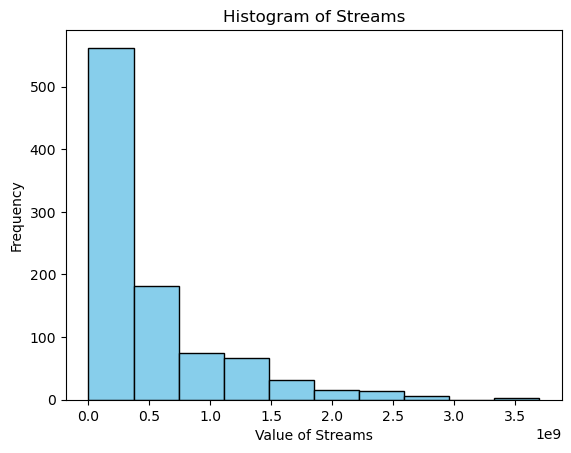

In [120]:
# Create a histogram
plt.hist(df[['streams']], bins=10, color='skyblue', edgecolor='black')

# Add axis labels and a title
plt.xlabel('Value of Streams')
plt.ylabel('Frequency')
plt.title('Histogram of Streams')

# Display the plot
plt.show()

In [121]:
a = [['Hi', '!'], ['hello', 'what', 'is', 'up']]

for sublist in a:
    for item in sublist:
        print(item)
       

Hi
!
hello
what
is
up


# Model Training (rf)

In [122]:
"""X is or are the parameters (uppercase)"""
X = df[['acousticness_%', 'instrumentalness_%', 'bpm']]
X = X[:int(len(df)-1)] 

"""y (always in lowercase), are the target values"""
y = df['streams']
y = y[:int(len(df)-1)]
rf.fit(X,y) #Training the model


RandomForestRegressor()

# Testing the model

In [123]:
# model test
predictions_1 = rf.predict(X)
print(f"The model score is: {rf.score(X,y)}")

The model score is: 0.7520189052271589


# Making the predictions

In [124]:
new_data = df[['acousticness_%', 'instrumentalness_%', 'bpm']].tail(1)
prediction = rf.predict(new_data)
print(f"model predicts last row to be: {np.format_float_positional(prediction)}")

model predicts last row to be: 259998024.37
